<h1 style="color:lime;" id="date">Date: 20-01-2026</h1>


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

# Import data

In [71]:
metadata = pd.read_csv("https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/refs/heads/master/metadata.csv",usecols=["view","filename"])

In [72]:
metadata.head()

,view,filename
0,PA,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,PA,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,PA,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,PA,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,PA,nejmc2001573_f1a.jpeg


# Changing the data types

In [73]:
metadata.view = metadata.view.astype('str');
metadata.filename = metadata.filename.astype('str');


In [74]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   view      950 non-null    object
 1   filename  950 non-null    object
dtypes: object(2)
memory usage: 15.0+ KB


# Count of original view categories

```
# This is formatted as code
```



In [75]:
count_of_views_before = metadata.view.value_counts()
count_of_views_before

,count
view,
PA,344
AP Supine,234
AP,203
L,84
Axial,68
Coronal,16
AP Erect,1


# Filtering the dataset based on views

In [76]:
metadata_final = metadata[metadata.view.isin(['PA','AP','AP Supine','AP Erect'])]
metadata_final.head()

,view,filename
0,PA,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,PA,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,PA,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,PA,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,PA,nejmc2001573_f1a.jpeg


In [77]:
metadata_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 948
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   view      782 non-null    object
 1   filename  782 non-null    object
dtypes: object(2)
memory usage: 18.3+ KB


# Count of views after filtering

In [78]:
count_of_views_after = metadata_final.view.value_counts()
count_of_views_after

,count
view,
PA,344
AP Supine,234
AP,203
AP Erect,1


[]

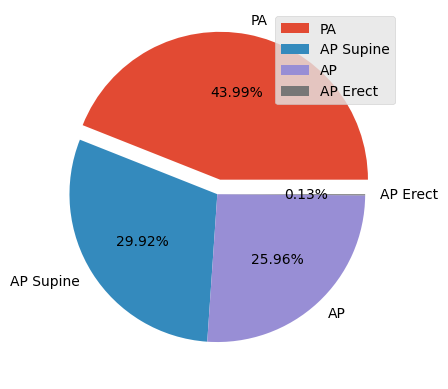

In [79]:
proportion_of_views = metadata_final.view.value_counts(normalize=True)*100
plt.style.use("ggplot")
plt.pie(proportion_of_views,autopct="%.2f%%",labels=proportion_of_views.index,explode=[0.1,0,0,0])
plt.legend(proportion_of_views.index)
plt.plot()

# Separating the images based on view value

In [80]:
base_url = "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/refs/heads/master/images"

def fetch_image(row):
    filename = row.filename
    if row['view'] == 'PA':
      urllib.request.urlretrieve(f"{base_url}/{filename}",f"/content/drive/MyDrive/DM/images/PA/{filename}")
    else:
      urllib.request.urlretrieve(f"{base_url}/{filename}",f"/content/drive/MyDrive/DM/images/AP/{filename}")
    return row


In [81]:
! mkdir -p /content/drive/MyDrive/DM/images/{AP,PA}

In [82]:
meta_final = metadata_final.apply(fetch_image,axis="columns")
meta_final.head()

KeyboardInterrupt: 

# Total number of files

In [83]:
total_files = metadata.filename.value_counts().sum()

total_files_after = metadata_final.filename.value_counts().sum()

proportion_of_views = proportion_of_views.round(2).astype(str) + "%"

proportion_of_views

,proportion
view,
PA,43.99%
AP Supine,29.92%
AP,25.96%
AP Erect,0.13%


# Report

In [96]:
report = dict()
report['total_files_before_clean'] = total_files
report['total_files_after_clean'] = total_files_after

report_series = pd.Series(report)
report_df = pd.concat([report_series,proportion_of_views])
report_df.name = 'values'
report_df

,values
total_files_before_clean,950
total_files_after_clean,782
PA,43.99%
AP Supine,29.92%
AP,25.96%
AP Erect,0.13%
